# Figure 3 (main text)


In [1]:
cd '/Users/starr/My Drive/Files/Projects/U1475/subproject_repos/SS_Paper/Starr_etal_ACC'

/Users/starr/My Drive/Files/Projects/U1475/subproject_repos/SS_Paper/Starr_etal_ACC


In [2]:
# preamble
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from scipy import signal,stats
from scipy.interpolate import interp1d
from matplotlib import gridspec

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.size'] = 10
mpl.rcParams["mathtext.fontset"] = "dejavusans"

plt.style.use('default')

mis_bounds = pd.read_csv('data/misc/LR04_MISboundaries.txt')
# remove sub-stages from table\n",
mis_bounds.drop([4,5,6,7,8],inplace=True)
mis_bounds.iloc[-1]={'MIS':'0/1','Age(ka)':0}
mis_bounds.sort_values('Age(ka)',inplace=True)
mis_bounds.reset_index(drop=True,inplace=True)


### define age_model function
def age_model(depth_in,ties):
    f = interp1d(ties.iloc[:,0],ties.iloc[:,1],fill_value='extrapolate')
    age = f(depth_in)
    return age

In [3]:
def filtered(x,y,highcut,tnew = [0,0]):
    """ Interpolate to linear scale and apply low-pass butterworth filter
    
   
    returns:
    x_lin -- the linear scale for the desired record
    r_filt -- the filtered RGB red record
    r_lin -- the linearly inteprolated RGB red record
    """
    fs = np.mean(np.diff(x))

    if len(tnew)>2:
        x_lin = tnew
    else:
        minx = np.min(x)+1
        maxx = np.max(x)-1
        x_lin = np.arange(minx,maxx,fs)
    f = interp1d(x,y,fill_value='extrapolate')
    y_lin = f(x_lin)
    y_filt = butter_lowpass_filter(y_lin, highcut, 1/fs, order=5)
    return x_lin, y_filt, y_lin

def butter_lowpass(highcut, fs, order=5):
    nyq = 0.5 * fs
    high = highcut/nyq
    b, a = signal.butter(order, high, btype='low',analog=False)
    return b, a

def butter_lowpass_filter(data, highcut, fs = 0.5, order=6):
    b, a = butter_lowpass(highcut, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y



lpf = 1/4


In [4]:
# load data
## ---- APcomp! ---- ##
apcomp = pd.read_csv('tables/ap_comp_ss.csv')

##### external data #####
## ---- Drake Passage records ---- ##
ps97_ss = pd.read_csv('tables/ps97_ss.csv')
ps97_093_xrf = pd.read_excel('data/external_data.xlsx',sheet_name='PS97_097_xrf',header=12)

## ---- Prob Stack ---- ##
prob = pd.read_excel('data/external_data.xlsx',sheet_name='Prob_Stack',header=9)

## ---- ODP 1094 ---- ##
odp1094_11 = pd.read_excel('data/external_data.xlsx',sheet_name='ODP1094_seaice_11',header=11)
odp1094_31_ = pd.read_excel('data/external_data.xlsx',sheet_name='ODP1094_seaice_31',header=8)
seaice = ['Actinocyclus actinochilus','Fragilariopsis curta','Fragilariopsis cylindrus','Fragilariopsis obliquecostata','Porosira glacialis','Thalassiosira antarctica','Eucampia antarctica']
odp1094_31 = pd.DataFrame()
odp1094_31['Age [ka BP]'] = odp1094_31_['age (kyr)']
for s in seaice:
    if s in odp1094_31_.columns:
        odp1094_31[s] = odp1094_31_[s]
        
odp1094_31['SI'] = odp1094_31[seaice].sum(axis=1)


## ---- Ice core source-site temp ---- ##
domefuji = pd.read_excel('data/external_data.xlsx',sheet_name='Dome_Fuji_iso',header=13)
domefuji['Age'] = domefuji['Age']/1000

## ---- ODP1123 ---- ##
odp1123_ss = pd.read_csv('tables/odp1123_ss.csv')

## ---- U1540/U1541 ---- ##
u1540_ss = pd.read_csv('tables/u1540_ss.csv')
u1541_ss = pd.read_csv('tables/u1541_ss.csv')
u1541_d18o = pd.read_excel('data/external_data.xlsx',sheet_name='U1541_d18O',header=25)


## ---- ODP 1090 clay data from Diekmann and Kuhn (2002) ---- ##
odp1090_clay = pd.read_excel('data/external_data.xlsx',sheet_name='ODP1090_clay',header=19)

## ---- ODP 1090 alkenone data from Martinez-Garcia et al., 2010
odp1090_sst = pd.read_excel('data/external_data.xlsx',sheet_name='ODP1090_SST',header=7)

## ---- U1475 %NPS (Marcks et al., 2023) ---- ##
u1475_nps = pd.read_excel('data/external_data.xlsx',sheet_name='U1475_NPS',header=11)

## ---- ODP 1090 % NPS (Becquey and Gersonde 2002) ---- ##
odp1090_nps = pd.read_excel('data/external_data.xlsx',sheet_name='ODP1090_NPS',header=14)

In [6]:
u1541_ss

,Unnamed: 0,Age [ka BP],ln(Zr/Rb),SS [um],ACC strength [m/s],ACC strength [%],SS_dHolocene,dU_dhol_mccave,dU_dhol_mccave_2std,pct_dU_dHol_mccave,dU_dhol_wu,pct_dU_dHol_wu,dU_dhol_culp
0,0,0.5,1.6932,16.9067,7.9266,100.286,0.23013,0.312977,0.043725,1.379963,0.174899,1.379963,0.324484
1,1,1.0,1.6932,16.9067,7.9266,100.286,0.23013,0.312977,0.043725,1.379963,0.174899,1.379963,0.324484
2,2,1.5,1.6932,16.9067,7.9266,100.286,0.23013,0.312977,0.043725,1.379963,0.174899,1.379963,0.324484
3,3,2.0,1.6932,16.9067,7.9266,100.286,0.23013,0.312977,0.043725,1.379963,0.174899,1.379963,0.324484
4,4,2.5,1.6932,16.9067,7.9266,100.286,0.23013,0.312977,0.043725,1.379963,0.174899,1.379963,0.324484
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10595,10595,5298.0,1.0785,15.4267,5.4181,68.549,-1.24987,-1.699823,-0.237475,-7.494764,-0.949901,-7.494764,-1.762316
10596,10596,5298.5,1.0785,15.4267,5.4181,68.549,-1.24987,-1.699823,-0.237475,-7.494764,-0.949901,-7.494764,-1.762316
10597,10597,5299.0,1.0785,15.4267,5.4181,68.549,-1.24987,-1.699823,-0.237475,-7.494764,-0.949901,-7.494764,-1.762316
10598,10598,5299.5,1.0785,15.4267,5.4181,68.549,-1.24987,-1.699823,-0.237475,-7.494764,-0.949901,-7.494764,-1.762316


<>:229: SyntaxWarning: invalid escape sequence '\m'
<>:230: SyntaxWarning: invalid escape sequence '\m'
<>:231: SyntaxWarning: invalid escape sequence '\m'
<>:235: SyntaxWarning: invalid escape sequence '\m'
<>:236: SyntaxWarning: invalid escape sequence '\m'
<>:229: SyntaxWarning: invalid escape sequence '\m'
<>:230: SyntaxWarning: invalid escape sequence '\m'
<>:231: SyntaxWarning: invalid escape sequence '\m'
<>:235: SyntaxWarning: invalid escape sequence '\m'
<>:236: SyntaxWarning: invalid escape sequence '\m'
/var/folders/c_/cgbnj8n943z0v0kv5qjmw2s00000gn/T/ipykernel_56143/85070290.py:229: SyntaxWarning: invalid escape sequence '\m'
  ax_l[0].set_ylabel('$\mathrm{\delta^{18}O_{benthic}}$\n$(^o/_{oo})$')
/var/folders/c_/cgbnj8n943z0v0kv5qjmw2s00000gn/T/ipykernel_56143/85070290.py:230: SyntaxWarning: invalid escape sequence '\m'
  ax_l[2].set_ylabel('$\mathrm{\Delta U}$ (cm/s)')
/var/folders/c_/cgbnj8n943z0v0kv5qjmw2s00000gn/T/ipykernel_56143/85070290.py:231: SyntaxWarning: invalid 

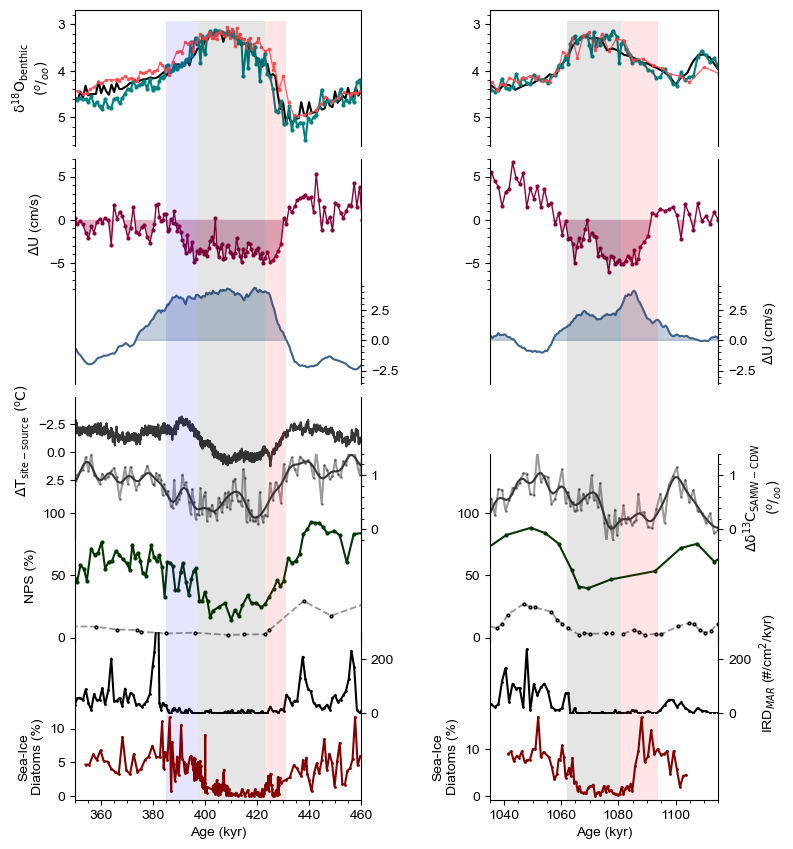

In [8]:
### PLOT ###
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.size'] = 10
mpl.rcParams["mathtext.fontset"] = "dejavusans"
mpl.rcParams['font.size'] = 10
ss_color = '#4a4e69'
c2 = '#023e8a'
c3 = '#0077b6'
c1 = '#4a4e69'
c3 = 'xkcd:denim'
c4 = c1
c1 = ss_color


c1 = '#89023e'
c4 = '#a6808c'


f = plt.figure(figsize=(9,11))
gs = gridspec.GridSpec(9,2,wspace=0.5,hspace=0,width_ratios=[1,0.8],height_ratios=[1,0.5,1.4,1,1,1,1,1,1])

ax_l = {}
ax_m = {}

ax_l[0] = f.add_subplot(gs[0,0])
ax_m[0] = f.add_subplot(gs[0,1])

for i in range(1,9):
    ax_l[i] = f.add_subplot(gs[i,0])
    ax_m[i] = f.add_subplot(gs[i,1])

    
    
###### constant
for ax in [ax_l,ax_m]:    

    ax[0].plot(prob['Age [kyr]'],prob['d18O_stack'],label='Prob-Stack',color='k',lw=1.5)
    n = apcomp['Cwu d18O (VPDB)'].notnull()
    ax[0].plot(apcomp['LR04_age'][n],apcomp['Cwu d18O (VPDB)'][n]+0.43,label='APcomp',color='teal',marker='o',ms=2,lw=1.5)
    ax[0].invert_yaxis()
    ax[0].plot(u1541_d18o['Age model [ka] (Output age, Hidden Markov Mod...)'],u1541_d18o['Cibicidoides spp. δ18O [‰ PDB] (Average Cibicidoides spp d18O...)']+0.3,lw=1,color='xkcd:light red',alpha=0.8,marker='s',label='U1451',ms=1.5)

    # n = odp1123_d18o['d18O Uvi'].notnull()
    # ax[0].plot(odp1123_d18o['Age LR04 (ky)'][n],odp1123_d18o['d18O Uvi'][n],label='ODP1123',color='xkcd:mauve',alpha=0.8,lw=1)

    # ax[1].plot(ps97_093_xrf['Revised Age [kyr['],np.log(ps97_093_xrf['Ca [cts]']/ps97_093_xrf['Fe [cts]']),lw=1.2,label='PS97/093 Revised Age',color='xkcd:denim')

    
    n = apcomp['dU_dhol_mccave'].notnull()
    ax[2].plot(apcomp['LR04_age'][n],apcomp['dU_dhol_mccave'][n],color=c1,alpha=1,lw=1,marker='o',ms=2)
    y0 = apcomp['dU_dhol_mccave'][n].copy()
    y0[y0>0]=0
    ax[2].fill_between(apcomp['LR04_age'][n],0,y0,alpha=0.3,ec='none',fc=c1)
    ax[2].set_ylim(-8,7)
#     n = odp1123_ss['dU_dhol_mccave'].notnull()
#     ax[3].plot(odp1123_ss['LR04_age'][n],odp1123_ss['dU_dhol_mccave'][n],color='xkcd:mauve',alpha=1,lw=1,ms=1,marker='o')

    
    # n = ps97_ss['dU_dhol_wu'].notnull()
    # y = ps97_ss['dU_dhol_wu'][n]
    # t = ps97_ss['Revised Age (Starr)'][n]
    # ax[3].plot(t,y,color=c3,marker='o',ms=2)
    # y0 = y.copy()
    # y0[y0<0]=np.nan
    # ax[3].fill_between(t,y0,0,color=c3,alpha=0.3)
    
    n = u1541_ss['dU_dhol_mccave'].notnull()
    y = u1541_ss['dU_dhol_mccave'][n]
    t = u1541_ss['Age [ka BP]'][n]
    ax[3].plot(t,y,color=c3)
    y0 = y.copy()
    y0[y0<0]=np.nan
    ax[3].fill_between(t,y0,0,color=c3,alpha=0.3)
    
    y = apcomp['Gtrunc d13C (VPDB)'] - apcomp['Cwu d13C (VPDB)'] 
    x = apcomp['LR04_age']
    n = y.notnull()
    x=x[n]
    y=y[n]
    ax[5].plot(x,y,marker='o',ms=1,color='xkcd:dark grey',alpha=0.5)
    t,y,pp = filtered(x,y,1/7)
    ax[5].plot(t,y,lw=1.5,color='xkcd:dark grey',marker='o',ms=0)
    ax[5].set_ylim(-0.2,1.4)
    
    x = domefuji['Age']
    y = domefuji['T_site']-domefuji['T_source']
    n = y.notnull()
    x=x[n]
    y=y[n]
    ax[4].plot(x,y,color='xkcd:dark grey')
    # t,y,pp = filtered(x,y,1/7)
    # ax[5].plot(t,y,lw=1.5,color='xkcd:dark grey')
    ax[4].invert_yaxis()



    ## NPS
    x = odp1090_nps['Age (Martinez)']
    y = odp1090_nps['N. pachyderma s [%]']
    n = y.notnull()
    ax[6].plot(x,y,marker='o',ms=2,color='xkcd:dark green')

    x = u1475_nps['Age model [ka]']
    y = u1475_nps['N. pachyderma s [%]']
    n = y.notnull()
    ax[6].plot(x,y,marker='o',lw=1.3,ms=2,markeredgecolor='k',color='xkcd:grey',linestyle='--')

    ax[7].plot(apcomp['LR04_age'],apcomp['IRD MAR '],color='xkcd:black',marker='o',ms=1)
    ax[7].set_ylim(0,300)

    
    



###### MIS 11
##### ax_l MIS 11
k_1094=odp1094_11.sort_values(by='Age [ka BP]')
ax_l[8].plot(k_1094['Age [ka BP]'],k_1094['Sea-ice ind [%]'],color='xkcd:dark red',marker='o',ms=1)


##### MIS 31
ax_m[8].plot(odp1094_31['Age [ka BP]'],odp1094_31['SI'],color='xkcd:dark red',marker='o',ms=1)

    
#### ----format--- ####
for ax in [ax_l,ax_m]:    
    for i in range(0,9):
        ax[i].patch.set_visible(False)
        if i != 0:
            ax[i].spines['top'].set_visible(False)
        elif i != 8:
            ax[i].spines['bottom'].set_visible(False)
        if i==0:
            ax[i].xaxis.set_ticks_position('none')
    for i in range(1,8):
        ax[i].set_xticks([])
        ax[i].spines['bottom'].set_visible(False)
        ax[i].spines['top'].set_visible(False)

    ax[0].yaxis.set_minor_locator(MultipleLocator(0.2))
    ax[2].yaxis.set_minor_locator(MultipleLocator(1))
    ax[3].yaxis.set_minor_locator(MultipleLocator(0.5))
    ax[5].yaxis.set_minor_locator(MultipleLocator(0.2))



    for i in np.arange(1,8,2):
        ax[i].yaxis.set_ticks_position('right')
        ax[i].yaxis.set_label_position('right')
for i in range(0,9):
    ax_l[i].set_xlim(350,460)
    ax_m[i].set_xlim(1035,1115)



for a in [ax_l,ax_m]:

    box = a[6].get_position()
    box.y0=box.y0-0.025
    box.y1=box.y1+0.02
    a[6].set_position(box)

    box = a[0].get_position()
    box.y0=box.y0-0.04
    box.y1=box.y1+0.01
    a[0].set_position(box)

    box = a[1].get_position()
    box.y1=box.y1+0.01
    a[1].set_position(box)

    box = a[2].get_position()
    box.y1=box.y1-0.01
    box.y0=box.y0-0.018
    a[2].set_position(box)
    
    box = a[3].get_position()
    box.y1=box.y1-0.012
    box.y0=box.y0-0.027
    a[3].set_position(box)
#     a[2].set_ylim(-7,7)
    
    box = a[4].get_position()
    box.y0=box.y0-0.04
    box.y1=box.y1-0.04
    a[4].set_position(box)
    
    box = a[5].get_position()
    box.y0=box.y0-0.01
    box.y1=box.y1-0.01
    a[5].set_position(box)
    
    box = a[7].get_position()
    box.y0=box.y0-0.01
    box.y1=box.y1-0.015
    a[7].set_position(box)
    
    box = a[8].get_position()
    box.y0=box.y0-0.01
    box.y1=box.y1-0.01
    a[8].set_position(box)
    
#     box = a[8].get_position()
#     box.y1=box.y1+0.01
#     a[8].set_position(box)

ax_l[8].xaxis.set_minor_locator(MultipleLocator(5))
ax_m[8].xaxis.set_minor_locator(MultipleLocator(5))
ax_l[0].xaxis.set_minor_locator(MultipleLocator(5))
ax_m[0].xaxis.set_minor_locator(MultipleLocator(5))

    
ax_m[1].set_ylim(-0.5,2.5)


ymax = 9
ax_l[8].axvspan(385,397,ymax=ymax,clip_on=False,alpha=0.1,fc='b')
ax_l[8].axvspan(397,423,ymax=ymax,clip_on=False,alpha=0.1,fc='k')
ax_l[8].axvspan(423,431,ymax=ymax,clip_on=False,alpha=0.1,fc='r')

ax_m[8].axvspan(1062,1081,ymax=ymax,clip_on=False,alpha=0.1,fc='k')
ax_m[8].axvspan(1081,1094,ymax=ymax,clip_on=False,alpha=0.1,fc='r')



### labels
ax_l[0].set_ylabel('$\mathrm{\delta^{18}O_{benthic}}$\n$(^o/_{oo})$')
ax_l[2].set_ylabel('$\mathrm{\Delta U}$ (cm/s)')
ax_l[4].set_ylabel('$\mathrm{\Delta T_{site-source}\ (^oC)}$')
ax_l[6].set_ylabel('NPS (%)')
ax_l[8].set_ylabel('Sea-Ice\nDiatoms (%)')

ax_m[3].set_ylabel('$\mathrm{\Delta U}$ (cm/s)')
ax_m[5].set_ylabel('$\mathrm{\Delta\delta^{13}C_{SAMW-CDW}}$\n$(^o/_{oo})$')
ax_m[8].set_ylabel('Sea-Ice\nDiatoms (%)')
ax_m[7].set_ylabel('IRD$_{MAR}$ (#/cm$^2$/kyr)')


ax_l[8].set_xlabel('Age (kyr)')
ax_m[8].set_xlabel('Age (kyr)')
ax_l[0].tick_params(labeltop=False)
ax_m[0].tick_params(labeltop=False)
ax_l[0].tick_params(labelbottom=False)
ax_m[0].tick_params(labelbottom=False)

ax_m[1].axis('off')
ax_l[1].axis('off')
ax_m[4].axis('off')
f.set_size_inches(8.3,10)

plt.savefig('figures/F3_draft.pdf',bbox_inches='tight')

In [28]:
bafe = pd.read_excel('data/external_data.xlsx',sheet_name='ODP1094_BaFe',header=8)
bafe


,depth_m,Age [kyr],ca/fe,ba/fe
0,6.315,11.486810,0.913511,0.456599
1,6.320,11.495906,0.949017,0.442095
2,6.330,11.514098,0.990952,0.328537
3,6.340,11.532290,1.012226,0.527029
4,6.350,11.550482,1.001847,0.415677
...,...,...,...,...
5015,121.140,994.042549,0.687234,0.078825
5016,121.160,994.279725,0.863345,0.079698
5017,121.180,994.516900,0.755744,0.098225
5018,121.200,994.754076,0.725134,0.083673


<>:23: SyntaxWarning: invalid escape sequence '\D'
<>:24: SyntaxWarning: invalid escape sequence '\D'
<>:25: SyntaxWarning: invalid escape sequence '\D'
<>:23: SyntaxWarning: invalid escape sequence '\D'
<>:24: SyntaxWarning: invalid escape sequence '\D'
<>:25: SyntaxWarning: invalid escape sequence '\D'
/var/folders/c_/cgbnj8n943z0v0kv5qjmw2s00000gn/T/ipykernel_72859/1161068436.py:23: SyntaxWarning: invalid escape sequence '\D'
  a.set_ylabel('APcomp $\Delta$U (cm/s)')
/var/folders/c_/cgbnj8n943z0v0kv5qjmw2s00000gn/T/ipykernel_72859/1161068436.py:24: SyntaxWarning: invalid escape sequence '\D'
  ax0.set_ylabel('U1540 $\Delta$U (cm/s)')
/var/folders/c_/cgbnj8n943z0v0kv5qjmw2s00000gn/T/ipykernel_72859/1161068436.py:25: SyntaxWarning: invalid escape sequence '\D'
  ax1.set_ylabel('U1541 $\Delta$U (cm/s)')


Text(0.5, 0, 'Age (kyr)')

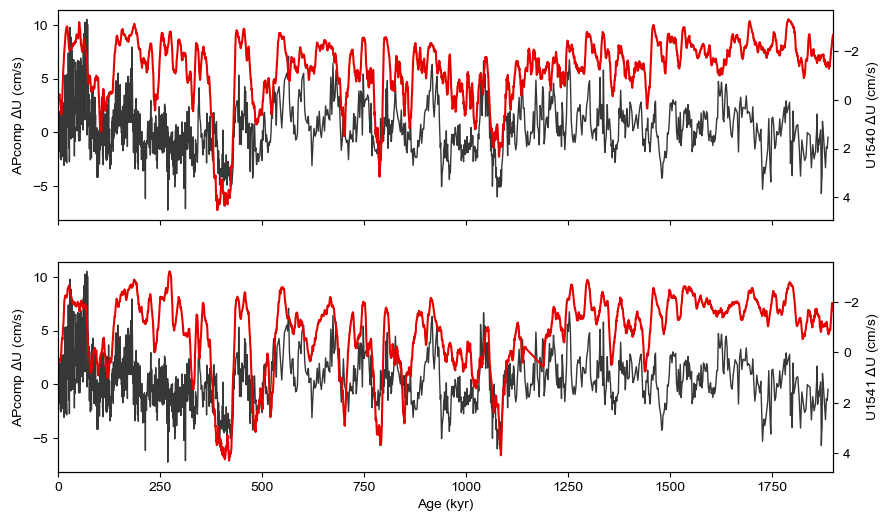

In [25]:
f,ax = plt.subplots(2,1,sharex=True,figsize=(10,6))
n = apcomp['dU_dhol_mccave'].notnull()
ax[0].plot(apcomp['LR04_age'][n],apcomp['dU_dhol_mccave'][n],color='xkcd:dark grey',alpha=1,lw=1)
ax[1].plot(apcomp['LR04_age'][n],apcomp['dU_dhol_mccave'][n],color='xkcd:dark grey',alpha=1,lw=1)

ax0=ax[0].twinx()
n = u1540_ss['dU_dhol_mccave'].notnull()
y = u1540_ss['dU_dhol_mccave'][n]
t = u1540_ss['Age [ka BP]'][n]
ax0.plot(t,y,color='xkcd:red')
ax0.invert_yaxis()
ax[0].set_xlim(0,1900)

ax1=ax[1].twinx()
n = u1541_ss['dU_dhol_mccave'].notnull()
y = u1541_ss['dU_dhol_mccave'][n]
t = u1541_ss['Age [ka BP]'][n]
ax1.plot(t,y,color='xkcd:red')
ax1.invert_yaxis()
ax[1].set_xlim(0,1900)

for a in ax:
    a.set_ylabel('APcomp $\Delta$U (cm/s)')
ax0.set_ylabel('U1540 $\Delta$U (cm/s)')
ax1.set_ylabel('U1541 $\Delta$U (cm/s)')
ax[1].set_xlabel('Age (kyr)')